<a href="https://colab.research.google.com/github/DivGamit/DivGamit-Mask-Detection-using-CNN/blob/main/Mask_Detection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d omkargurav/face-mask-dataset

 98% 160M/163M [00:08<00:00, 26.0MB/s]
100% 163M/163M [00:08<00:00, 20.5MB/s]


In [4]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('extracted')

extracted


In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [6]:
with_mask = os.listdir('/content/data/with_mask')
without_mask = os.listdir('/content/data/without_mask')
print(len(with_mask))
print(len(without_mask))

3725
3828


In [7]:
print(with_mask[0:5])
print(without_mask[-5:])

['with_mask_341.jpg', 'with_mask_3196.jpg', 'with_mask_3383.jpg', 'with_mask_1258.jpg', 'with_mask_2301.jpg']
['without_mask_1663.jpg', 'without_mask_791.jpg', 'without_mask_3089.jpg', 'without_mask_465.jpg', 'without_mask_3181.jpg']


In [8]:
with_mask_label = [1] * 3725
without_mask_label = [0] * 3828

In [9]:
labels = with_mask_label + without_mask_label
print(len(labels))

7553


In [10]:
print(labels[0 : 10])
print(labels[-10 :])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


# Displaying images to check the size and difference

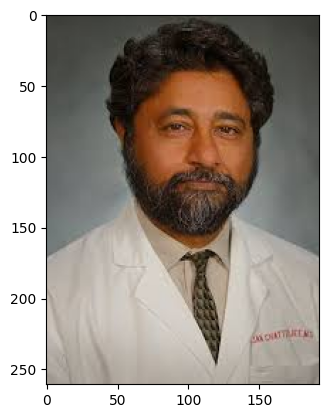

In [11]:
img = mpimg.imread('/content/data/without_mask/without_mask_1663.jpg')
plot = plt.imshow(img)
plt.show()

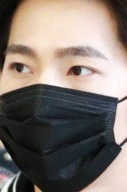

In [12]:
img = cv2.imread('/content/data/with_mask/with_mask_341.jpg')
cv2_imshow(img)


In [13]:
mask_path = '/content/data/with_mask/'
without_path = '/content/data/without_mask/'
with_mask = os.listdir('/content/data/with_mask')
without_mask = os.listdir('/content/data/without_mask')
data = []


In [14]:
for  img_show in with_mask:
  image = Image.open(mask_path + img_show)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [15]:
for  img_show in without_mask :
  image = Image.open(without_path + img_show)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


In [16]:
len(data)

7553

In [17]:
type(data)

list

In [18]:
print(labels[0:5])
print(labels[-5:])
type(labels)

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


list

Changing data and labels in np array

In [19]:
X = np.array(data)
Y = np.array(labels)

In [20]:
type(X)
type(Y)

numpy.ndarray

In [21]:
#train and test spliting
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)
print(X_train.shape, X_test.shape)
print(X.shape)

(6042, 128, 128, 3) (1511, 128, 128, 3)
(7553, 128, 128, 3)


In [22]:
# scaling process
X_train_scale = X_train/255
X_test_scale = X_test/255

In [23]:
X_train_scale[0]  # scaling in done between 0 to 1 for each images


array([[[0.2       , 0.23137255, 0.29803922],
        [0.20392157, 0.23529412, 0.29803922],
        [0.20784314, 0.24705882, 0.30588235],
        ...,
        [0.24313725, 0.30980392, 0.38823529],
        [0.24313725, 0.30980392, 0.38823529],
        [0.24705882, 0.31372549, 0.39215686]],

       [[0.2       , 0.23529412, 0.29803922],
        [0.20392157, 0.23921569, 0.29803922],
        [0.21176471, 0.24705882, 0.30588235],
        ...,
        [0.25098039, 0.31764706, 0.39607843],
        [0.25098039, 0.31764706, 0.39607843],
        [0.25098039, 0.31764706, 0.39607843]],

       [[0.2       , 0.23529412, 0.29411765],
        [0.20784314, 0.24313725, 0.30196078],
        [0.21176471, 0.25098039, 0.30980392],
        ...,
        [0.25490196, 0.32156863, 0.4       ],
        [0.25490196, 0.32156863, 0.4       ],
        [0.25490196, 0.32156863, 0.4       ]],

       ...,

       [[0.23921569, 0.2745098 , 0.30196078],
        [0.20784314, 0.24313725, 0.27058824],
        [0.18431373, 0

In [24]:
# CNN model
import tensorflow as tp
from tensorflow import keras

In [32]:
classes = 2                                        # mask and without mask (2 classes)
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size = (3,3), activation ='relu', input_shape = (128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size= (2,2)))

model.add(keras.layers.Conv2D(64, kernel_size = (3,3), activation ='relu'))
model.add(keras.layers.MaxPooling2D(pool_size= (2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(classes, activation = 'sigmoid'))

In [33]:
model.compile(optimizer= 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])

In [34]:
training = model.fit(X_train_scale, Y_train, validation_split = 0.1, epochs = 5)

Epoch 1/5
170/170 [==============================] - 7s 20ms/step - loss: 0.4776 - acc: 0.7892 - val_loss: 0.3123 - val_acc: 0.8711
Epoch 2/5
170/170 [==============================] - 3s 19ms/step - loss: 0.2969 - acc: 0.8814 - val_loss: 0.2815 - val_acc: 0.8926
Epoch 3/5
170/170 [==============================] - 3s 16ms/step - loss: 0.2639 - acc: 0.8961 - val_loss: 0.2263 - val_acc: 0.8926
Epoch 4/5
170/170 [==============================] - 3s 18ms/step - loss: 0.2302 - acc: 0.9097 - val_loss: 0.2210 - val_acc: 0.9140
Epoch 5/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1907 - acc: 0.9253 - val_loss: 0.2113 - val_acc: 0.9124


In [35]:
testing = model.evaluate(X_test_scale, Y_test)

48/48 [==============================] - 0s 9ms/step - loss: 0.2024 - acc: 0.9206


Path of the image/content/download.jpg


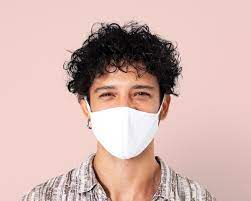

1/1 [==============================] - 0s 19ms/step
[[0.09945352 0.90147847]]
THE PERSON IS WEARING A MASK


In [41]:
input_path = input('Path of the image')

image = cv2.imread(input_path)

cv2_imshow(image)

image_resized = cv2.resize(image, (128,128))
image_scale = image_resized/255
image_reshaped = np.reshape(image_scale, [1,128,128,3])
predict = model.predict(image_reshaped)
print(predict)
predicted = np.argmax(predict)
if predicted  == 1:
  print('THE PERSON IS WEARING A MASK')
else:
  print('THE PERSON IS NOT WEARING A MASK')